In [1]:
pip install --upgrade pandas_datareader

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Genaro\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
#This program uses RNN called LSTM to predict stock price of a corporation (Apple Inc.) Using the past 60 day stock price.

In [3]:
#Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime

In [5]:
#Get the stock quote
df = web.DataReader('BTC-USD', data_source = 'yahoo', start = '2014-09-14', end='now')
df

C:\Users\Genaro\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014
...,...,...,...,...,...,...
2022-06-19,20683.822266,18067.152344,19010.902344,20553.271484,35329942625,20553.271484
2022-06-20,20913.322266,19689.169922,20553.371094,20599.537109,30818458597,20599.537109
2022-06-21,21620.628906,20415.062500,20594.294922,20710.597656,28970212744,20710.597656


In [6]:
#Get the number of rows and columns in the dataset
df.shape

(2837, 6)

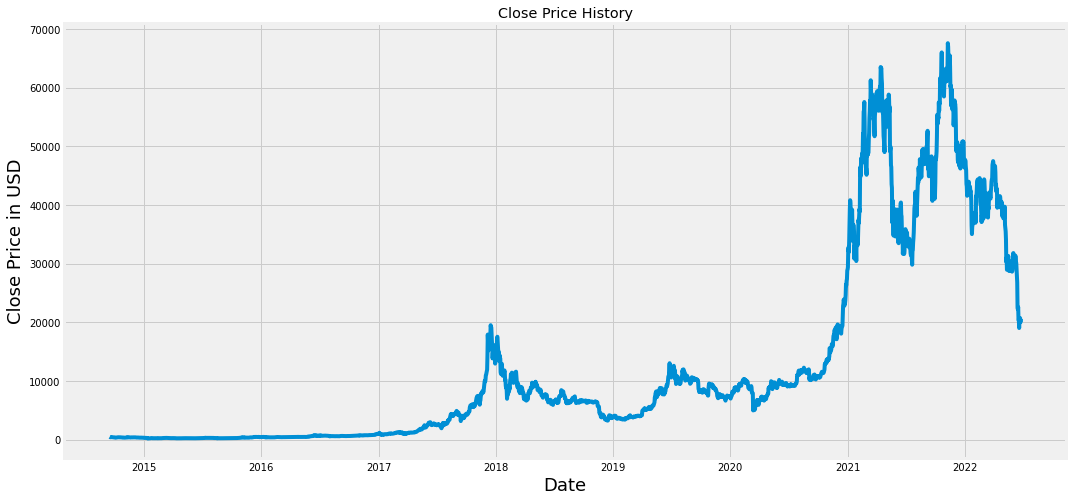

In [7]:
#Visualize the close price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD', fontsize = 18)
plt.show()

In [8]:
#Just set up scaler
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
#Reset index so it will be easier to watch the index later
test_df = df.reset_index()
test_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
1,2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2,2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
3,2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
4,2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014
...,...,...,...,...,...,...,...
2832,2022-06-19,20683.822266,18067.152344,19010.902344,20553.271484,35329942625,20553.271484
2833,2022-06-20,20913.322266,19689.169922,20553.371094,20599.537109,30818458597,20599.537109
2834,2022-06-21,21620.628906,20415.062500,20594.294922,20710.597656,28970212744,20710.597656
2835,2022-06-22,20835.750000,19848.078125,20719.414062,19987.029297,28574793478,19987.029297


In [10]:
#This block to limit training data if needed, we dont use test data in here because we just want to predict future price
clostest = test_df.filter(['Close', 'Date'])
#clostest = clostest[-5000:]
clostest = clostest.reset_index()
clostest = clostest.drop(['index'], axis = 1)
clostest

,Close,Date
0,457.334015,2014-09-17
1,424.440002,2014-09-18
2,394.795990,2014-09-19
3,408.903992,2014-09-20
4,398.821014,2014-09-21
...,...,...
2832,20553.271484,2022-06-19
2833,20599.537109,2022-06-20
2834,20710.597656,2022-06-21
2835,19987.029297,2022-06-22


In [11]:
def input_prediction(table):

  closecol = table.filter(['Close'])

  inlast_60_days = closecol.values



#scale the data to values between 0 and 1
  inlast_60_days_scaled = scaler.fit_transform(inlast_60_days)

  train_data = inlast_60_days_scaled

  x_train = [] #independent training variables
  y_train = [] #dependent training variables

  for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i, 0])



  x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


  #Build LSTM Model
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(LSTM(50, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))

  #Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')

#This is where we fit data into model for train data
  model.fit(x_train, y_train, batch_size = 1, epochs = 1)



#create empty list
  inx_test = []

#append the past 60 days
  inx_test.append(inlast_60_days_scaled[-60:])

#convert the x_test to a numpy array
  inx_test = np.array(inx_test)

#reshape the data
  inx_test = np.reshape(inx_test, (inx_test.shape[0], inx_test.shape[1], 1))

#get predicted scale price
  inpred_price = model.predict(inx_test)

#undo scaling
  inpred_price = scaler.inverse_transform(inpred_price)

  return float(inpred_price)

In [12]:
#Using second last price because the last price still changing over time
clos = pd.DataFrame({"Date":[test_df.iloc[-2,0]], "Close":[test_df.iloc[-2,1]]})

#Running the prediction for 10 days ahead (because i use in range (1,11). It can be changed if needed)
for i in range(1,31):
  newvalpred = input_prediction(clostest)
  delta = datetime.timedelta(days=1)
  start_date = clostest.iloc[-1,1]
  newclos = pd.DataFrame({"Date":[start_date+delta], "Close":[newvalpred]})
  clos = clos.append(newclos)

  clostest = clostest.append(newclos)
  clostest.reset_index(inplace=True)
  clostest = clostest.drop(['index'], axis = 1)

1/1 [==============================] - 1s 564ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 513ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 515ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 646ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 530ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 512ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 524ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 518ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 513ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 519ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 517ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 514ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 518ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 536ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 516ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 514ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 525ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 525ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 517ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 514ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 518ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 533ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 510ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 524ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 513ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 517ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 516ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 520ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 514ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


1/1 [==============================] - 1s 516ms/step


C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clos = clos.append(newclos)
C:\Users\Genaro\AppData\Local\Temp\ipykernel_25216\3492738933.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clostest = clostest.append(newclos)


In [13]:
#set index to date
clos.set_index('Date', inplace=True)
clos

,Close
Date,
2022-06-22,20835.750000
2022-06-24,19627.554688
2022-06-25,20007.195312
2022-06-26,20270.585938
2022-06-27,19742.263672
2022-06-28,19906.607422
2022-06-29,20608.269531
2022-06-30,19796.839844
2022-07-01,22325.000000


In [14]:
#just take 100 days before so you can easily see the prediction
df_100rowsbef = df[-100:-1]
df_100rowsbef

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-16,41465.453125,39022.347656,39335.570312,41143.929688,39616916192,41143.929688
2022-03-17,41287.535156,40662.871094,41140.843750,40951.378906,22009601093,40951.378906
2022-03-18,42195.746094,40302.398438,40944.839844,41801.156250,34421564942,41801.156250
2022-03-19,42316.554688,41602.667969,41794.648438,42190.652344,19664853187,42190.652344
2022-03-20,42241.164062,41004.757812,42191.406250,41247.824219,20127946682,41247.824219
...,...,...,...,...,...,...
2022-06-18,20736.041016,17708.623047,20473.425781,19017.642578,42009436760,19017.642578
2022-06-19,20683.822266,18067.152344,19010.902344,20553.271484,35329942625,20553.271484
2022-06-20,20913.322266,19689.169922,20553.371094,20599.537109,30818458597,20599.537109


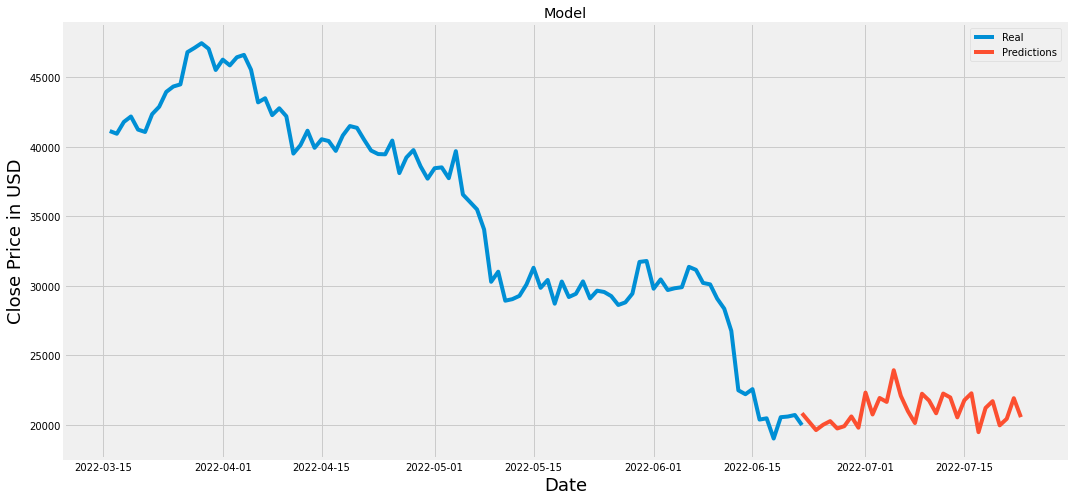

In [15]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD', fontsize =18)
plt.plot(df_100rowsbef['Close'])
plt.plot(clos['Close'])
plt.legend(['Real', 'Predictions'])
plt.show()

We can see the red line which the value of predicted future 10 days close price